In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

salary_df = pd.read_csv('../data/01_raw/salary.csv')
people_df = pd.read_csv('../data/01_raw/people.csv')
descriptions_df = pd.read_csv('../data/01_raw/descriptions.csv')

In [3]:
print(f"Dataset shape: {salary_df.shape}")
salary_df.head()

Dataset shape: (375, 2)


,id,Salary
0,0,90000.0
1,1,65000.0
2,2,150000.0
3,3,60000.0
4,4,200000.0


In [4]:
salary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      375 non-null    int64  
 1   Salary  373 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 6.0 KB


Two null salary -> Remove in the data processing steps

In [5]:
salary_df.describe()

,id,Salary
count,375.000000,373.000000
mean,187.000000,100577.345845
std,108.397417,48240.013482
min,0.000000,350.000000
25%,93.500000,55000.000000
50%,187.000000,95000.000000
75%,280.500000,140000.000000
max,374.000000,250000.000000


In [6]:
print(f"Dataset shape: {people_df.shape}")
people_df.head()

Dataset shape: (375, 6)


,id,Age,Gender,Education Level,Job Title,Years of Experience
0,0,32.0,Male,Bachelor's,Software Engineer,5.0
1,1,28.0,Female,Master's,Data Analyst,3.0
2,2,45.0,Male,PhD,Senior Manager,15.0
3,3,36.0,Female,Bachelor's,Sales Associate,7.0
4,4,52.0,Male,Master's,Director,20.0


In [7]:
# Check values in Education Level column and check how many are in each category
print(people_df['Education Level'].unique())
print(people_df['Education Level'].value_counts())


["Bachelor's" "Master's" 'PhD' nan]
Education Level
Bachelor's    222
Master's       97
PhD            51
Name: count, dtype: int64


In [9]:
# Check values in Job Title column and check how many are in each category
print(people_df['Job Title'].unique())
print(people_df['Job Title'].value_counts())



['Software Engineer' 'Data Analyst' 'Senior Manager' 'Sales Associate'
 'Director' 'Marketing Analyst' 'Product Manager' 'Sales Manager'
 'Marketing Coordinator' 'Senior Scientist' 'Software Developer'
 'HR Manager' 'Financial Analyst' 'Project Manager' 'Customer Service Rep'
 'Operations Manager' 'Marketing Manager' 'Senior Engineer'
 'Data Entry Clerk' 'Sales Director' 'Business Analyst' 'VP of Operations'
 'IT Support' 'Recruiter' 'Financial Manager' 'Social Media Specialist'
 'Software Manager' 'Junior Developer' 'Senior Consultant'
 'Product Designer' 'CEO' 'Accountant' 'Data Scientist'
 'Marketing Specialist' 'Technical Writer' 'HR Generalist'
 'Project Engineer' 'Customer Success Rep' 'Sales Executive' 'UX Designer'
 'Operations Director' 'Network Engineer' 'Administrative Assistant'
 'Strategy Consultant' 'Copywriter' 'Account Manager'
 'Director of Marketing' 'Help Desk Analyst' 'Customer Service Manager'
 nan 'Event Coordinator' 'VP of Finance' 'Graphic Designer'
 'UX Researc

In [11]:
def group_job_titles(title):
    """
    Group job titles into meaningful categories based on seniority and department.
    
    Args:
        title: The job title string
        
    Returns:
        A string representing the job title group
    """
    if pd.isna(title):
        return "Unknown"
        
    title = str(title).lower()
    
    # Extract seniority
    if "junior" in title or "jr" in title:
        seniority = "Junior"
    elif "senior" in title or "sr" in title or "principal" in title:
        seniority = "Senior" 
    elif "director" in title or "chief" in title or "vp" in title or "ceo" in title or "cto" in title:
        seniority = "Executive"
    else:
        seniority = "Mid-level"
        
    # Extract department/function
    if any(word in title for word in ["engineer", "developer", "software", "web", "technical", "network", "it ", "data scientist"]):
        department = "Technical"
    elif any(word in title for word in ["sales", "account", "business development"]):
        department = "Sales"
    elif any(word in title for word in ["marketing", "social media", "content", "copywriter"]):
        department = "Marketing"
    elif any(word in title for word in ["hr", "human resources", "recruit"]):
        department = "HR"
    elif any(word in title for word in ["finance", "financial", "accountant"]):
        department = "Finance"
    elif any(word in title for word in ["data", "analyst", "research", "scientist"]):
        department = "Analytics"
    elif any(word in title for word in ["product", "ux", "design"]):
        department = "Product"
    elif any(word in title for word in ["operations", "supply chain"]):
        department = "Operations"
    elif any(word in title for word in ["customer", "service", "support"]):
        department = "Customer Service"
    else:
        department = "Other"
        
    return f"{seniority}_{department}"

In [14]:
df = people_df.copy()
# Apply job title grouping function
df['Job Title Group'] = df['Job Title'].apply(group_job_titles)
# Check values in Job Title Group column and check how many are in each category
print(df['Job Title Group'].unique())
print(df['Job Title Group'].value_counts())

['Mid-level_Technical' 'Mid-level_Analytics' 'Senior_Other'
 'Mid-level_Sales' 'Executive_Other' 'Mid-level_Marketing'
 'Mid-level_Product' 'Senior_Analytics' 'Mid-level_HR' 'Mid-level_Finance'
 'Mid-level_Other' 'Mid-level_Customer Service' 'Mid-level_Operations'
 'Senior_Technical' 'Executive_Sales' 'Executive_Operations'
 'Junior_Technical' 'Executive_Marketing' 'Unknown' 'Executive_Finance'
 'Junior_Sales' 'Senior_Finance' 'Executive_Analytics' 'Executive_HR'
 'Junior_Product' 'Senior_Marketing' 'Senior_HR' 'Senior_Product'
 'Junior_Marketing' 'Junior_HR' 'Junior_Analytics' 'Senior_Sales'
 'Junior_Other' 'Junior_Customer Service' 'Junior_Finance'
 'Senior_Operations' 'Executive_Product' 'Junior_Operations'
 'Executive_Technical']
Job Title Group
Senior_Technical              28
Senior_Marketing              27
Senior_Analytics              22
Junior_Marketing              20
Junior_Analytics              17
Junior_Sales                  16
Senior_Other                  16
Senior_Pr

We can join data using 'id' variable

In [ ]:
people_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   375 non-null    int64  
 1   Age                  370 non-null    float64
 2   Gender               370 non-null    object 
 3   Education Level      370 non-null    object 
 4   Job Title            370 non-null    object 
 5   Years of Experience  373 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 17.7+ KB


We have some NA's or NULL data

In [ ]:
print(f"Dataset shape: {descriptions_df.shape}")
descriptions_df.head()

Dataset shape: (375, 2)


,id,Description
0,0,I am a 32-year-old male working as a Software ...
1,1,I am a 28-year-old data analyst with a Master'...
2,2,I am a 45-year-old Senior Manager with a PhD a...
3,3,I am a 36-year-old female Sales Associate with...
4,4,I am a 52-year-old male with over two decades ...


## Lets explore the target variable 'Salary'

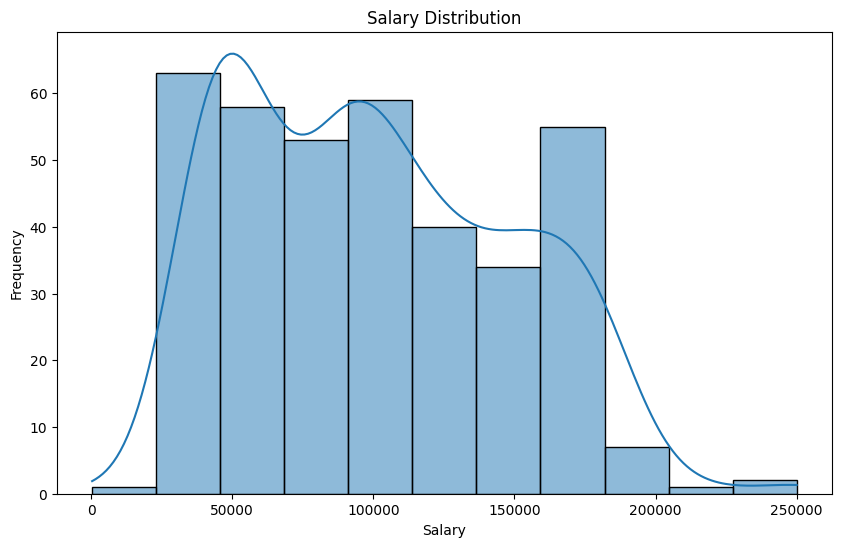

In [ ]:
# Distribution of the target variable
plt.figure(figsize=(10, 6))
sns.histplot(salary_df['Salary'], kde=True)
plt.title('Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Check for skewness
print(f"Skewness: {salary_df['Salary'].skew()}")

Skewness: 0.400578053273342


In [ ]:
The distribution is slightly right-skewed. Salary tend to be clustered towards the lower end. Seems to not be skewed enough to necessarily require transformation.

## Visualize the relationships between features and the target variable.

In [ ]:
merged_data = salary_df.merge(people_df, on='id', how='left')
merged_data.head()

,id,Salary,Age,Gender,Education Level,Job Title,Years of Experience
0,0,90000.0,32.0,Male,Bachelor's,Software Engineer,5.0
1,1,65000.0,28.0,Female,Master's,Data Analyst,3.0
2,2,150000.0,45.0,Male,PhD,Senior Manager,15.0
3,3,60000.0,36.0,Female,Bachelor's,Sales Associate,7.0
4,4,200000.0,52.0,Male,Master's,Director,20.0


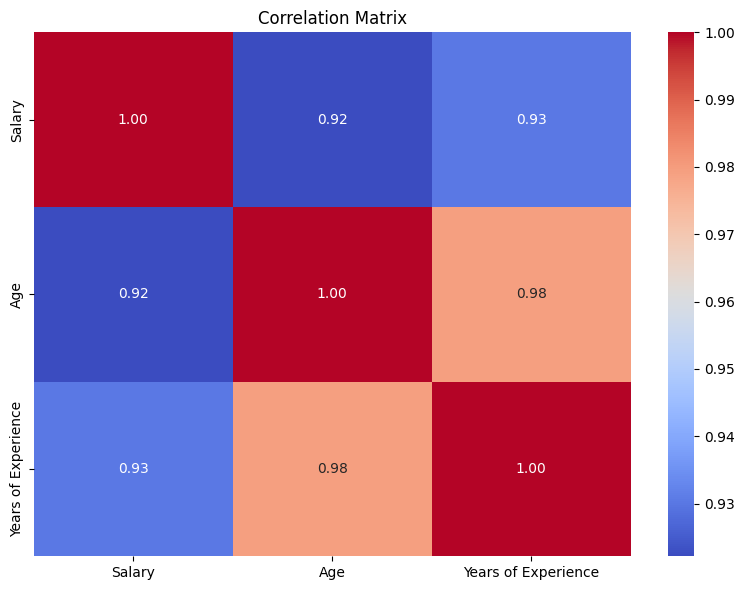

In [ ]:
numeric_cols = merged_data.select_dtypes(include=['int64', 'float64']).columns
# Exclude 'id' from correlation
numeric_cols = numeric_cols[numeric_cols != 'id']
# Calculate correlation matrix
correlation = merged_data[numeric_cols].corr()

# Heatmap of correlations
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

In [ ]:
There is a high positive correlation between the salary and the numerical features age and years of experience. This is expected.

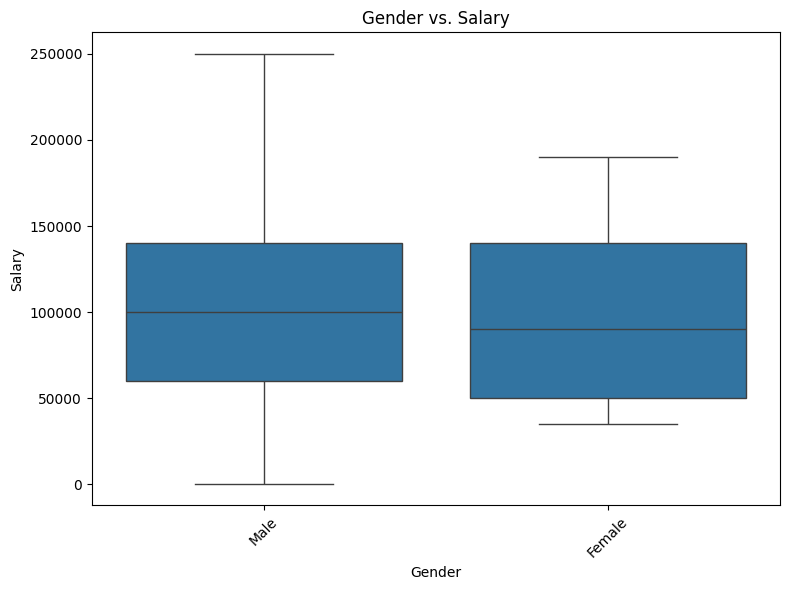

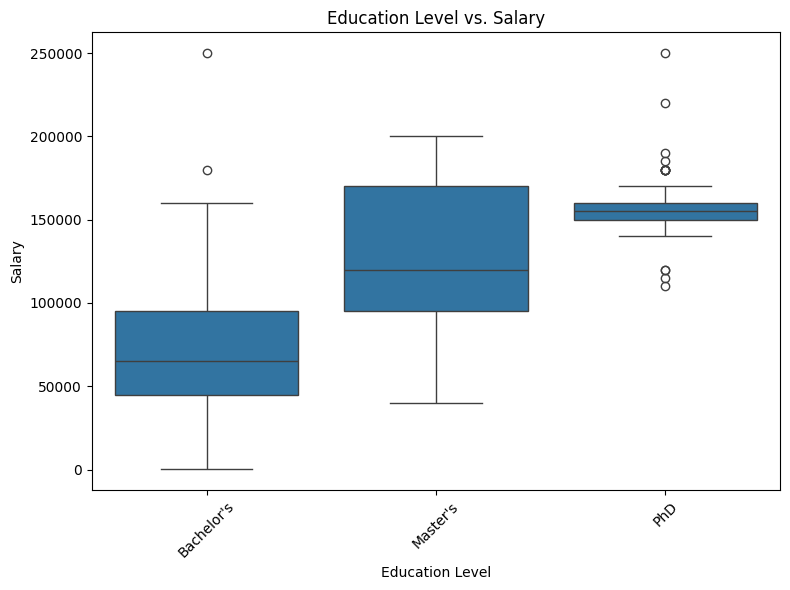

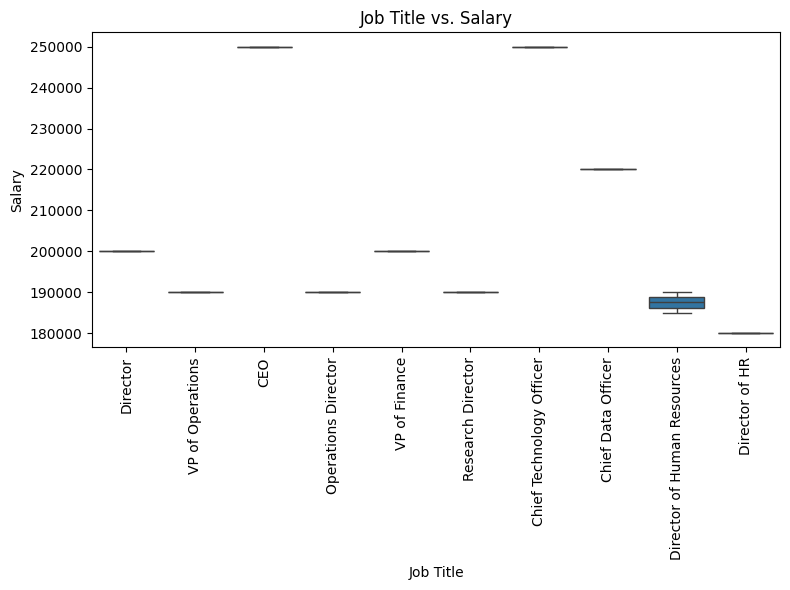

In [ ]:
# Categorical variables analysis
categorical_cols = merged_data.select_dtypes(include=['object']).columns

# Create visualizations for categorical variables
for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    if merged_data[col].nunique() < 10:
        # For columns with few unique values
        sns.boxplot(x=col, y='Salary', data=merged_data)
        plt.xticks(rotation=45)
    else:
        # For columns with many unique values
        # Group and show top 10 categories by average salary
        top_categories = merged_data.groupby(col)['Salary'].mean().sort_values(ascending=False).head(10).index
        sns.boxplot(x=col, y='Salary', data=merged_data[merged_data[col].isin(top_categories)])
        plt.xticks(rotation=90)
    
    plt.title(f'{col} vs. Salary')
    plt.tight_layout()
    plt.show()

# Look at text features - if job descriptions are available
if 'job_description' in merged_data.columns:
    # Sample first 5 job descriptions to understand the data
    print("Sample job descriptions:")
    for i, desc in enumerate(merged_data['job_description'].head(5)):
        print(f"\nDescription {i+1}:\n{desc[:300]}...")

From the numerical variables we can see that the higher education levels get's a better salary. and that C-level exexutives are better paid.

We need to take care of the encoding of the Job Title